In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import string

In [3]:
results_dir = "/home/s2208943/ipdis/results/final_results_data/results/"

In [4]:
folders = os.listdir(results_dir)
folders = [f for f in folders if "ipynb" not in f]

In [5]:
folders

['ssn_mcdrop05',
 'punet_muonly10_DOMAIN_CHANGE',
 'ssn_ind_mu02_DOMAIN_CHANGE',
 'ssn_ind_mu01_DOMAIN_CHANGE',
 'ssn_ens_cust_small',
 'ssn_ind05',
 'ssn_ind_mu07',
 'evid_sensoyx5kl1',
 'evid_region01',
 'ssn_ind_mu02',
 'ssn_ens_DOMAIN_CHANGE',
 'ssn_mcdrop05_DOMAIN_CHANGE',
 'ssn_DOMAIN_CHANGE',
 'punet20_DOMAIN_CHANGE',
 'ssn_ind05_DOMAIN_CHANGE',
 'evid_sensoy5',
 'punet_muonly10',
 'ssn_ens_muonly',
 'ssn_mcdrop02',
 'ssn_ind_mu13',
 'ssn_ind_mu06_DOMAIN_CHANGE',
 'evid_sensoy5_DOMAIN_CHANGE',
 'punet10',
 'ssn_muonly',
 'ensemble',
 'ssn_mcdrop01_DOMAIN_CHANGE',
 'ensemble_DOMAIN_CHANGE',
 'evid_region01_DOMAIN_CHANGE',
 'punet10_DOMAIN_CHANGE',
 'ssn_ind_mu06',
 'ssn_ind_mu08_DOMAIN_CHANGE',
 'evid_sensoyx1kl1',
 'evid_sensoyx1kl1_DOMAIN_CHANGE',
 'evid_sensoyx5kl1_DOMAIN_CHANGE',
 'ssn',
 'ssn_mcdrop01',
 'ssn_ens',
 'punet20',
 'ssn_ens_cust_small_DOMAIN_CHANGE',
 'ssn_ens_cust_big_DOMAIN_CHANGE',
 'ssn_ind01',
 'ssn_ind_mu05',
 'ssn_ind_mu13_DOMAIN_CHANGE',
 'ssn_ind_mu01',

### extracting results to a dataframe

In [6]:
os.listdir(results_dir + folders[0])

['images',
 'sample_diversity_plot.png',
 'text_results.txt',
 'calibration.png',
 'pavpu.png',
 'types_violin.png',
 'UEO.png',
 '.ipynb_checkpoints',
 'tps.png',
 'fps.png',
 'fns.png']

In [7]:
with open(results_dir + folders[0] + "/text_results.txt") as f:
    column_names = ["method"]
    column_locations = [0]
    lines = f.readlines()
    
    for i, line in enumerate(lines[1:]): # title is on the first lien
        if line == '\n':
            continue
        else:
            line = line[:-1]
            if line[0].isalpha():
                column_names.append(line)
                column_locations.append(i+1)

In [8]:
with open(results_dir + folders[0] + "/text_results.txt") as file:
        filelength = len(file.readlines())

In [9]:
filelength

112

In [10]:
results_dir, f

('/home/s2208943/ipdis/results/final_results_data/results/',
 <_io.TextIOWrapper name='/home/s2208943/ipdis/results/final_results_data/results/ssn_mcdrop05/text_results.txt' mode='r' encoding='UTF-8'>)

In [11]:
columns = {c:[] for c in column_names}
for f in folders:
    with open(results_dir + f + "/text_results.txt") as file:
        lines = file.readlines()
        if len(lines) != filelength:
            continue # partial or failed evaluation runs
        columns['method'].append(f)
        for j, cn in enumerate(column_names[1:]):
            line = lines[column_locations[j+1]+1]
            line = line[:-1] # remove the \n at the end
            
            # convert to numbers
            if line != '':
                if line[0] != '[':
                    line = float(line)
                # else:
                #     line = list(line)
            
            columns[cn].append(line)

In [12]:
df = pd.DataFrame(columns)

### generating plots

# todo:
- [x] picking the techniques that I will benchmark
- [x] plot of basic metrics as box and whisker
- [x] plot of calibration per technique
- [ ] predict best threshold using pavpu and using UEO
- [ ] plot of TP, FN FP for each technique with best thresholds predicted
- [ ] plot of UEO per model
- [ ] plot of the mean coverage etc for each tau and highlight the best tau according to UEO and pavpu for both.
- [ ] nice table that covers all the metrics (GED, VCC, ECE all in one table
- [ ] comparsion of what happens if you have mu only vs mu on both for P-Unet and SSN ensemble.
- [ ] then get all the plots and tables for the out of domain data.

In [13]:
folders

['ssn_mcdrop05',
 'punet_muonly10_DOMAIN_CHANGE',
 'ssn_ind_mu02_DOMAIN_CHANGE',
 'ssn_ind_mu01_DOMAIN_CHANGE',
 'ssn_ens_cust_small',
 'ssn_ind05',
 'ssn_ind_mu07',
 'evid_sensoyx5kl1',
 'evid_region01',
 'ssn_ind_mu02',
 'ssn_ens_DOMAIN_CHANGE',
 'ssn_mcdrop05_DOMAIN_CHANGE',
 'ssn_DOMAIN_CHANGE',
 'punet20_DOMAIN_CHANGE',
 'ssn_ind05_DOMAIN_CHANGE',
 'evid_sensoy5',
 'punet_muonly10',
 'ssn_ens_muonly',
 'ssn_mcdrop02',
 'ssn_ind_mu13',
 'ssn_ind_mu06_DOMAIN_CHANGE',
 'evid_sensoy5_DOMAIN_CHANGE',
 'punet10',
 'ssn_muonly',
 'ensemble',
 'ssn_mcdrop01_DOMAIN_CHANGE',
 'ensemble_DOMAIN_CHANGE',
 'evid_region01_DOMAIN_CHANGE',
 'punet10_DOMAIN_CHANGE',
 'ssn_ind_mu06',
 'ssn_ind_mu08_DOMAIN_CHANGE',
 'evid_sensoyx1kl1',
 'evid_sensoyx1kl1_DOMAIN_CHANGE',
 'evid_sensoyx5kl1_DOMAIN_CHANGE',
 'ssn',
 'ssn_mcdrop01',
 'ssn_ens',
 'punet20',
 'ssn_ens_cust_small_DOMAIN_CHANGE',
 'ssn_ens_cust_big_DOMAIN_CHANGE',
 'ssn_ind01',
 'ssn_ind_mu05',
 'ssn_ind_mu13_DOMAIN_CHANGE',
 'ssn_ind_mu01',

In [14]:
# Samples

In [15]:
# Uncalibrated vs Calibrated umaps (pick two different images to give examples)

In [16]:
df[['method', 'mean dice']].loc[~df['method'].str.contains("DOMAIN")]

,method,mean dice
0,ssn_mcdrop05,0.688791
4,ssn_ens_cust_small,0.693182
5,ssn_ind05,0.676043
6,ssn_ind_mu07,0.679891
7,evid_sensoyx5kl1,0.668511
8,evid_region01,0.682929
9,ssn_ind_mu02,0.681330
15,evid_sensoy5,0.662993
16,punet_muonly10,0.690388
17,ssn_ens_muonly,0.697429


In [348]:
methods_map = {
    #"ssn_DOMAIN_CHANGE":"SSN\ndice all",
    "ssn_muonly_DOMAIN_CHANGE":"SSN",
    #"ssn_ens_DOMAIN_CHANGE": "Ensemble SSN",
    "ssn_ens_muonly_DOMAIN_CHANGE": "Ensemble SSN",
    "ssn_ind_mu01_DOMAIN_CHANGE":"Ind",
    #"ssn_ind02":"Ind\n dice all",
    #"evid_region01":"Evidential\nDice",
    "evid_sensoy5_DOMAIN_CHANGE":"Evidential",
    "ensemble_DOMAIN_CHANGE":"Ensemble",
    #"ssn_mcdrop01":"MC Dropout\n(p=0.1)",
    "ssn_mcdrop02_DOMAIN_CHANGE":"MC Dropout",
    #"ssn_mcdrop05":"MC Dropout\n(p=0.5)",
    #"punet10":"P-UNet 10\ndice all",
    "punet_muonly10_DOMAIN_CHANGE":"P-UNet",
    #"punet_muonly20":"P-UNet 20",
}

In [349]:
# select methods
dfm = df.loc[df["method"].isin(methods_map.keys())]
dfm = dfm.set_index('method')
dfa = df.set_index('method')

In [350]:
# check all selected methods have been found
len(methods_map), len(dfm)

(7, 7)

In [351]:
#fm

### Metrics Overview

In [352]:
def extract_list(ll):
    ll = ll[1:-1] # remove brackets
    elems = ll.split(", ")
    return [float(e) for e in elems]
    

In [353]:
# extract a dataframe of each metric
dfs = []
for method in methods_map.keys():
    dice = extract_list(dfm.loc[method]['dice'])
    hd95 = extract_list(dfm.loc[method]['hd95'])
    avd = extract_list(dfm.loc[method]['avd'])
    f1 = extract_list(dfm.loc[method]['f1'])
    recall = extract_list(dfm.loc[method]['recall'])
    l = len(dice)
    
    data = {}
    abrv_name = methods_map[method]
    data["method"] = np.array([abrv_name for i in range(l)])
    data["dice"] = dice
    data["hd95"] = hd95
    data["avd"] = avd
    data["f1"] = f1
    data["recall"] = recall
    
    
    
    dfi = pd.DataFrame(data)
    dfs.append(dfi)
    # break

In [354]:
metrics_df = pd.concat(dfs)

In [355]:
plt.style.use('fivethirtyeight')
sns.set_palette(sns.color_palette("colorblind"))
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [356]:
def save(root='./results/DOMAIN_plots/', fname='', small=False, img=False):
    plt.tight_layout()
    if small:
        plt.figure(figsize=(4,3))
    if img:    
        fname = "images/" + fname
    plt.savefig(root + fname, bbox_inches = "tight")
    plt.show()
    plt.clf()
    plt.close()

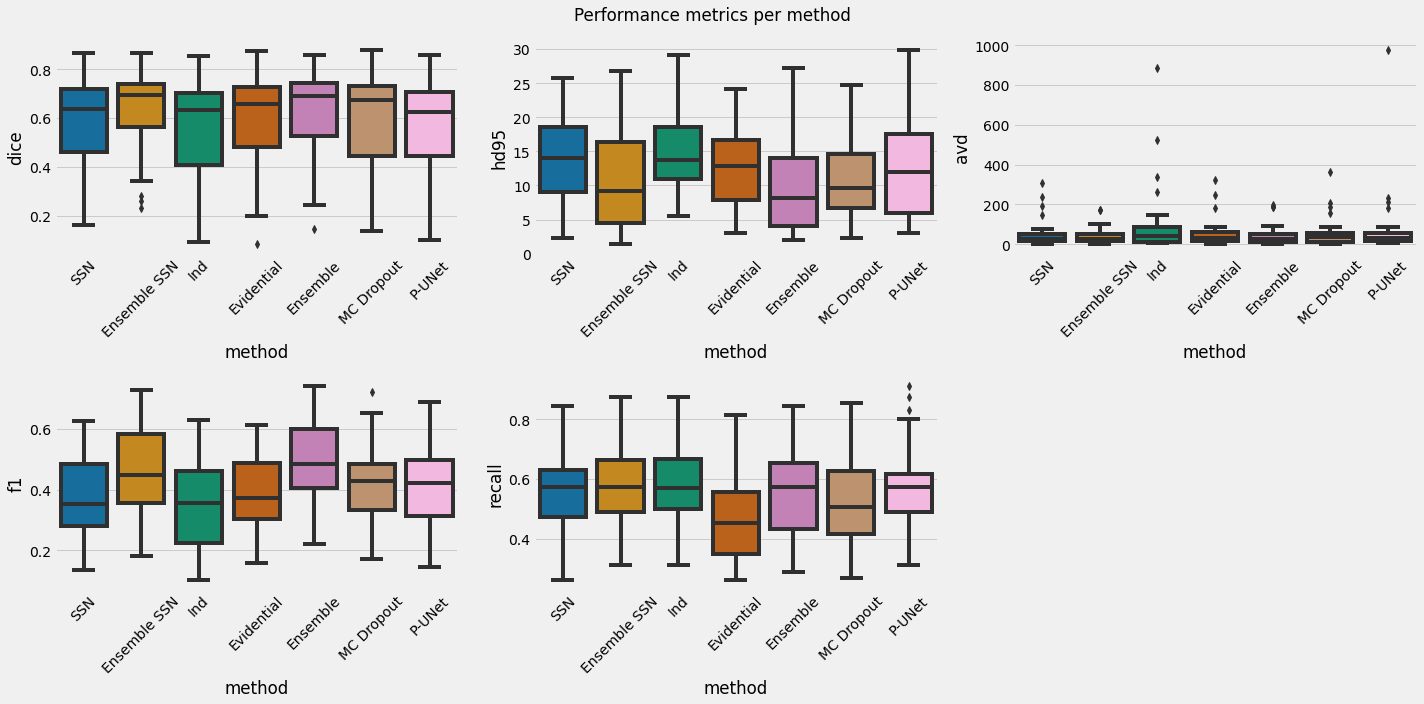

In [357]:

plt.figure(figsize=(20,10))
metrics = ['dice', 'hd95', 'avd', 'f1', 'recall']

for i, metric in enumerate(metrics):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=metrics_df, x="method", y=metric)
    plt.xticks(rotation = 45);
    
plt.suptitle("Performance metrics per method");

# save_result_plot("metrics_in_domain_deterministic")
save(fname='metrics')

### Image plots of uncertainty maps and samples

In [358]:
# Uncertainty Maps
scan_id = 27
slice_id = 37

flair_folder = "./results/results_collection_testing/images/"
flair_img = f"FLAIR: {scan_id}:{slice_id}.png"
gt_img = f"GT: {scan_id}:{slice_id}.png"


In [359]:
#os.listdir('./results/results_collection_testing/images/')

In [360]:
def counter():
    count = 0
    while True:
        count +=1
        yield count

In [361]:
[f for f in os.listdir("/home/s2208943/ipdis/results/final_results_data/results/" + method + "/images/") if "ent" in f]

['ent_map: -1:26.png',
 'ent_map: 0:22.png',
 'ent_map: 3:32.png',
 'ent_map: 27:33.png',
 'ent_map: 3:18.png',
 'ent_map: 0:24.png',
 'ent_map: -1:38.png',
 'ent_map: 27:37.png']

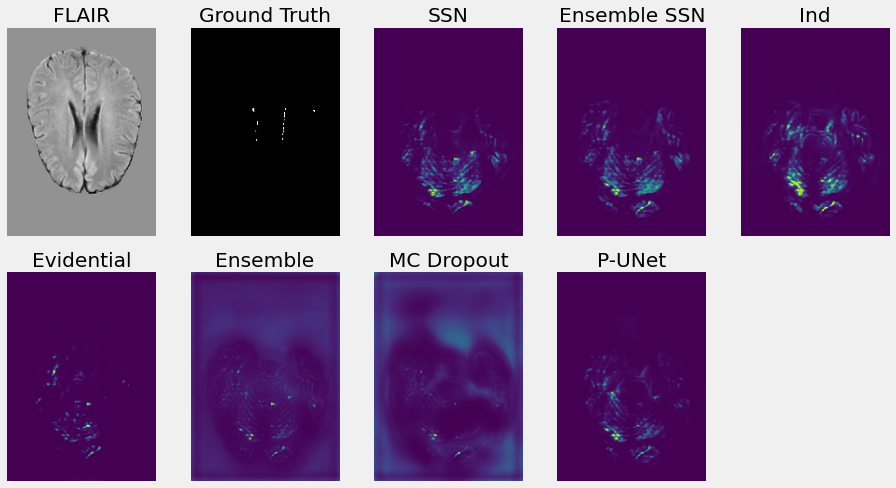

In [362]:
# Uncertainty Maps
scan_id = 27
slice_id = 37

flair_folder = "./results/results_collection_testing/images/"
flair_img = f"FLAIR: {scan_id}:{slice_id}.png"
gt_img = f"GT: {scan_id}:{slice_id}.png"

plt.figure(figsize=(13, 7))

cols = 5
rows = 2
c = counter()

img = plt.imread(flair_folder + flair_img)
plt.subplot(rows, cols, next(c))
plt.title('FLAIR')
plt.imshow(img); plt.axis('off')

img = plt.imread(flair_folder + gt_img)
plt.subplot(rows, cols, next(c))
plt.title('Ground Truth')
plt.imshow(img); plt.axis('off')


for method in methods_map.keys():
    img_folder = "/home/s2208943/ipdis/results/final_results_data/results/" + method + "/images/"
    ent_img = f"ent_map: {scan_id}:{slice_id}.png"
    img = plt.imread(img_folder + ent_img)
    plt.subplot(rows, cols, next(c))
    plt.title(methods_map[method])
    plt.imshow(img); plt.axis('off')

save(fname='umaps')

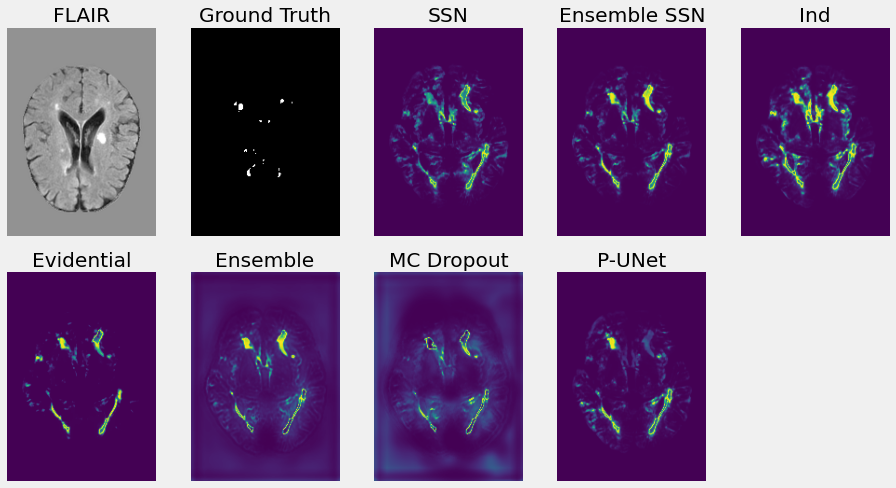

In [363]:
# Uncertainty Maps
scan_id = 0
slice_id = 22

flair_folder = "./results/results_collection_testing/images/"
flair_img = f"FLAIR: {scan_id}:{slice_id}.png"
gt_img = f"GT: {scan_id}:{slice_id}.png"

plt.figure(figsize=(13, 7))

cols = 5
rows = 2
c = counter()

img = plt.imread(flair_folder + flair_img)
plt.subplot(rows, cols, next(c))
plt.title('FLAIR')
plt.imshow(img); plt.axis('off')

img = plt.imread(flair_folder + gt_img)
plt.subplot(rows, cols, next(c))
plt.title('Ground Truth')
plt.imshow(img); plt.axis('off')


for method in methods_map.keys():
    img_folder = "/home/s2208943/ipdis/results/final_results_data/results/" + method + "/images/"
    ent_img = f"ent_map: {scan_id}:{slice_id}.png"
    img = plt.imread(img_folder + ent_img)
    plt.subplot(rows, cols, next(c))
    plt.title(methods_map[method])
    plt.imshow(img); plt.axis('off')

    
save(fname='umaps2')

In [364]:
import matplotlib.lines as lines

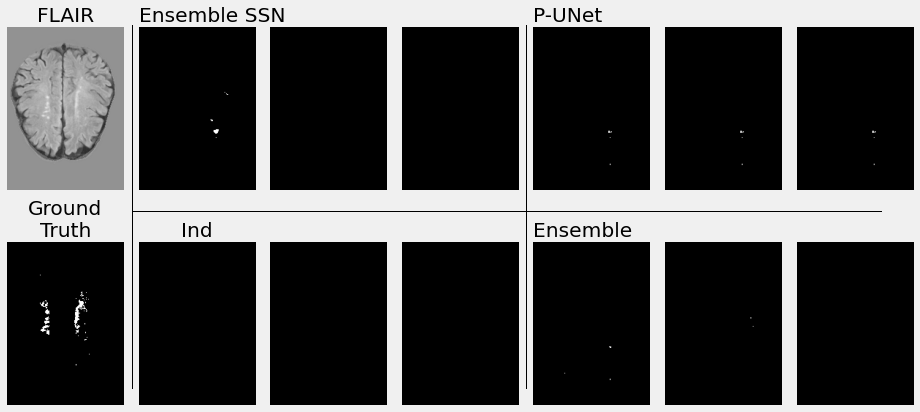

In [365]:
scan_id = -1
slice_id = 38

flair_folder = "./results/results_collection_testing/images/"
flair_img = f"FLAIR: {scan_id}:{slice_id}.png"
gt_img = f"GT: {scan_id}:{slice_id}.png"

# #"ssn":"SSN\ndice all",
# "ssn_muonly":"SSN",
# #"ssn_ens": "Ensemble SSN\ndice all",
# "ssn_ens_muonly": "Ensemble SSN",
# "ssn_ind_mu07":"Ind",
# #"ssn_ind02":"Ind\n dice all",
# #"evid_region01":"Evidential\nDice",
# "evid_sensoy5":"Evidential",
# "ensemble":"Ensemble",
# #"ssn_mcdrop01":"MC Dropout\n(p=0.1)",
# "ssn_mcdrop02":"MC Dropout",
# #"ssn_mcdrop05":"MC Dropout\n(p=0.5)",
# #"punet10":"P-UNet 10\ndice all",
# "punet_muonly10":"P-UNet",
# #"punet_muonly20":"P-UNet 20",

methods = ['ssn_ens_muonly_DOMAIN_CHANGE', 'punet_muonly10_DOMAIN_CHANGE', 'ssn_ind_mu01_DOMAIN_CHANGE', 'ensemble_DOMAIN_CHANGE']
samples = [[6,7,10],[5,17,19],[15,17,11],[5,13,7]]

### Samples plot
fig, axes = plt.subplots(2, 7, figsize=(13, 6), squeeze=False)
# plt.figure(figsize=(13, 7))
method_idx = 0
sample_idx = 0
for i, ax in enumerate(axes.flat):
    # flair
    if i == 0:
        img = plt.imread(flair_folder + flair_img)
        #plt.subplot(rows, cols, next(c))
        ax.set_title('FLAIR')
        ax.imshow(img); ax.axis('off')
        
    # gt
    elif i == 7:
        img = plt.imread(flair_folder + gt_img)
        # ax.subplot(rows, cols, next(c))
        ax.set_title('Ground\nTruth')
        ax.imshow(img); ax.axis('off')
        
    # sample plots
    else:
        method = methods[method_idx]
        img_folder = "/home/s2208943/ipdis/results/final_results_data/results/" + method + "/images/"
        sample_img = f"sample: {scan_id}:{slice_id}:{sample_idx}.png"
        img = plt.imread(img_folder + sample_img)
        # plt.subplot(rows, cols, next(c))
        if sample_idx == 0:
            loc = 'left' if methods_map[method] != 'Ind' else None
            ax.set_title(methods_map[method], loc=loc)
        ax.imshow(img); ax.axis('off')
        if sample_idx == 2:
            method_idx +=1
        sample_idx = (sample_idx + 1) % 3
        
    line = plt.Line2D([0.15,0.95],[0.5,0.5], transform=fig.transFigure, color="black", linewidth=1)
    fig.add_artist(line)
    
    line = plt.Line2D([0.15,0.15], [0.09,0.93], transform=fig.transFigure, color="black", linewidth=1)
    fig.add_artist(line)
    
    line = plt.Line2D([0.57,0.57],[0.09,0.93], transform=fig.transFigure, color="black", linewidth=1)
    fig.add_artist(line)
    
save(fname='samples')

### Calibration of each method

In [366]:
dfm.keys()

Index(['dice', 'hd95', 'avd', 'recall', 'f1', 'mean AVD', 'mean dice',
       'best_dice_mean', 'check: len samples', 'calibration curve data: ',
       'bin_accuracies: ', 'bin_confidences: ', 'EXPECTED CALIBRATION ERROR',
       'sample diversity', 'generalized energy distance:', 'p_acs:', 'p_aus:',
       'pavpu:', 'vvc correlation coefficient:', 'tp, fp, fn totals',
       'TP mean', 'FP mean', 'FN mean', 'TP ent values', 'FP ent values',
       'FN ent values', 'uncertainty thresholds',
       'mean coverage of areas missed by mean as tau increases',
       'mean size of entirely missed lesions',
       'mean coverage of lesions entirely missed by the mean segmentation',
       'total number of missing lesions',
       'proportion of lesions entirely missed', 'num lesions:', 'sUEO',
       'best tau for max UEO', 'max UEO', 'UEO per tau', 'tau AUC'],
      dtype='object')

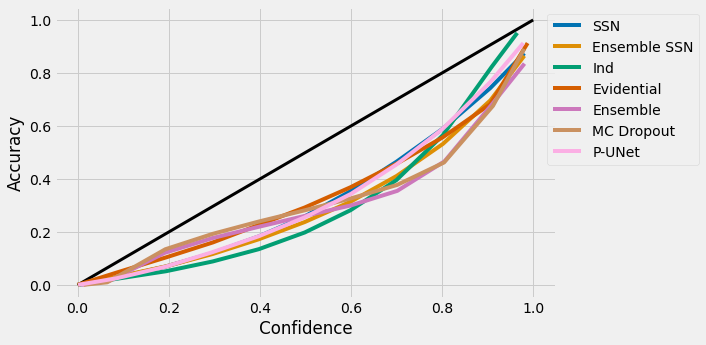

In [367]:
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in methods_map.keys():
    bin_accs = extract_list(dfm.loc[method]['bin_accuracies: '])
    bin_confs = bin_acc = extract_list(dfm.loc[method]['bin_confidences: '])
    
    plt.plot(bin_confs, bin_accs, linewidth=4, label=methods_map[method])

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Confidence")
plt.ylabel("Accuracy");
#plt.suptitle("Calibration Curves per method")
#save_result_plot("calibration_in_domain_deterministic")

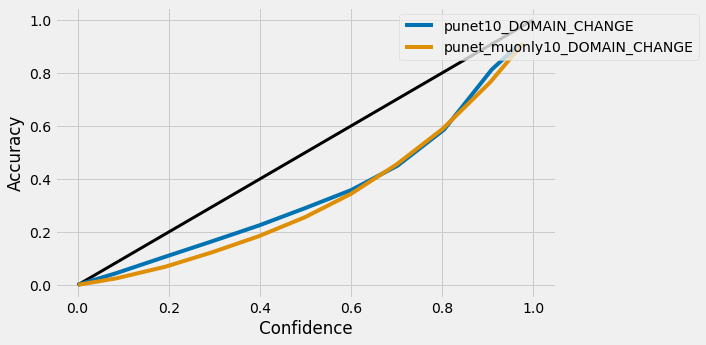

In [368]:
# comparison of punet dice all and no dice all
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in ["punet10_DOMAIN_CHANGE", "punet_muonly10_DOMAIN_CHANGE"]:
    bin_accs = extract_list(dfa.loc[method]['bin_accuracies: '])
    bin_confs = bin_acc = extract_list(dfa.loc[method]['bin_confidences: '])
    
    plt.plot(bin_confs, bin_accs, linewidth=4, label=method)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Confidence")
plt.ylabel("Accuracy");
#plt.suptitle("Calibration Curves per method")
#save_result_plot("calibration_in_domain_deterministic")

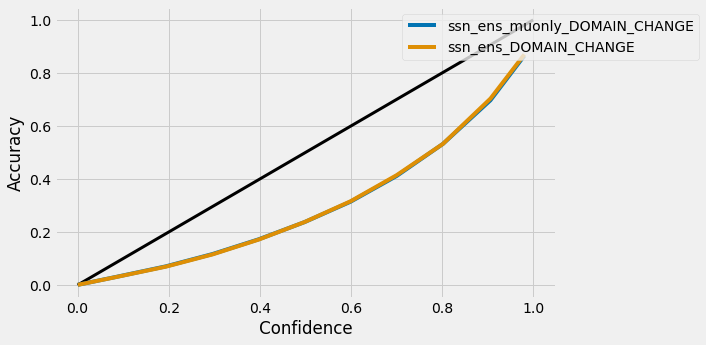

In [369]:
# comparison of punet dice all and no dice all
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in ["ssn_ens_muonly_DOMAIN_CHANGE", "ssn_ens_DOMAIN_CHANGE"]:
    bin_accs = extract_list(dfa.loc[method]['bin_accuracies: '])
    bin_confs = bin_acc = extract_list(dfa.loc[method]['bin_confidences: '])
    
    plt.plot(bin_confs, bin_accs, linewidth=4, label=method)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Confidence")
plt.ylabel("Accuracy");
#plt.suptitle("Calibration Curves per method")
#save_result_plot("calibration_in_domain_deterministic")

### Plot UEO per method

In [370]:
# tau_at_thresh = {}
# tau_index_at_thresh = {}
# for method in methods_map.keys():
#     taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
#     ueos = extract_list(dfm.loc[method]['UEO per tau'])
#     for i in range(len(ueos)):
#         if ueos[i] > 0.3:
#             break
#     tau_at_thresh[method] = taus[i]
#     tau_index_at_thresh[method] = i

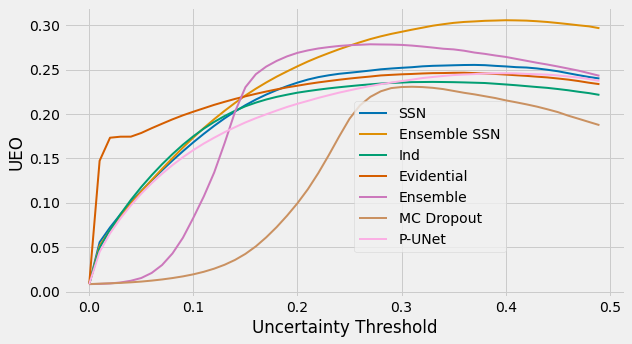

In [371]:
plt.figure(figsize=(9,5))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

r = 50
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])[:r]
    ueos = bin_acc = extract_list(dfm.loc[method]['UEO per tau'])[:r]
    plt.plot(taus, ueos, linewidth=2, label=methods_map[method])
    # plt.scatter([tau_at_thresh[method]], [ueo_thresh], c='black', marker='X')

plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.7))
plt.xlabel("Uncertainty Threshold")
plt.ylabel("UEO");

save(fname='UEO curve')

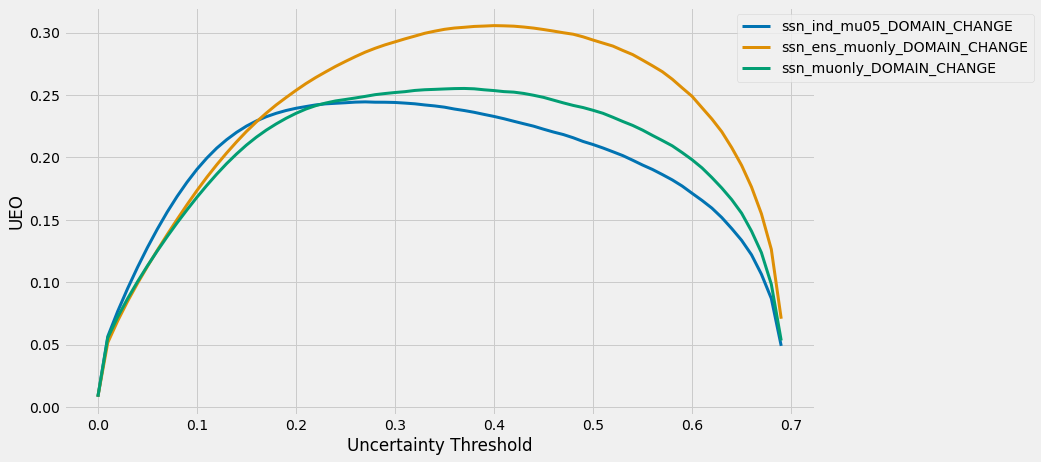

In [372]:
sns.set_palette(sns.color_palette("colorblind"))
plt.figure(figsize=(12,7))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

for method in ['ssn_ind_mu05_DOMAIN_CHANGE', 'ssn_ens_muonly_DOMAIN_CHANGE', 'ssn_muonly_DOMAIN_CHANGE']:
    taus = extract_list(dfa.loc[method]['uncertainty thresholds'])
    ueos = bin_acc = extract_list(dfa.loc[method]['UEO per tau'])
    plt.plot(taus, ueos, linewidth=3, label=method)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Uncertainty Threshold")
plt.ylabel("UEO");

In [373]:
folders

['evid_sensoyx5kl1',
 'ssn_mcdrop05',
 'ssn_ind_mu02_DOMAIN_CHANGE',
 'punet_muonly10_DOMAIN_CHANGE',
 'ssn_ind_mu01_DOMAIN_CHANGE',
 'ssn_ens_cust_small',
 'evid_region01',
 'evid_sensoy5',
 'ssn_ind_mu02',
 'ssn_ens_DOMAIN_CHANGE',
 'ssn_mcdrop05_DOMAIN_CHANGE',
 'punet_muonly20',
 'punet_muonly50',
 'ssn_DOMAIN_CHANGE',
 'punet_muonlyboth20',
 'punet20_DOMAIN_CHANGE',
 'ssn_ind_mu03_DOMAIN_CHANGE',
 'ssn_ens_muonly',
 'ssn_mcdrop02',
 'evid_sensoy5_DOMAIN_CHANGE',
 'punet_muonly10',
 'punet_muonlyboth5',
 'punet_muonlyboth10',
 'punet_muonlyboth50',
 'punet5_DOMAIN_CHANGE',
 'ssn_ind_mu03',
 'evid_sensoyx1kl1',
 'evid_region005',
 'ssn_ind02',
 'evid_region01_DOMAIN_CHANGE',
 'evid_sensoyx1kl1_DOMAIN_CHANGE',
 'evid_region005_DOMAIN_CHANGE',
 'evid_sensoyx5kl1_DOMAIN_CHANGE',
 'ssn_mcdrop01_DOMAIN_CHANGE',
 'ssn_muonly',
 'ensemble',
 'ensemble_DOMAIN_CHANGE',
 'punet_muonlyboth50_DOMAIN_CHANGE',
 'punet10',
 'punet5',
 'punet10_DOMAIN_CHANGE',
 'punet_muonly5',
 'ssn_mcdrop01',
 's

### Plot pavpu metrics per method

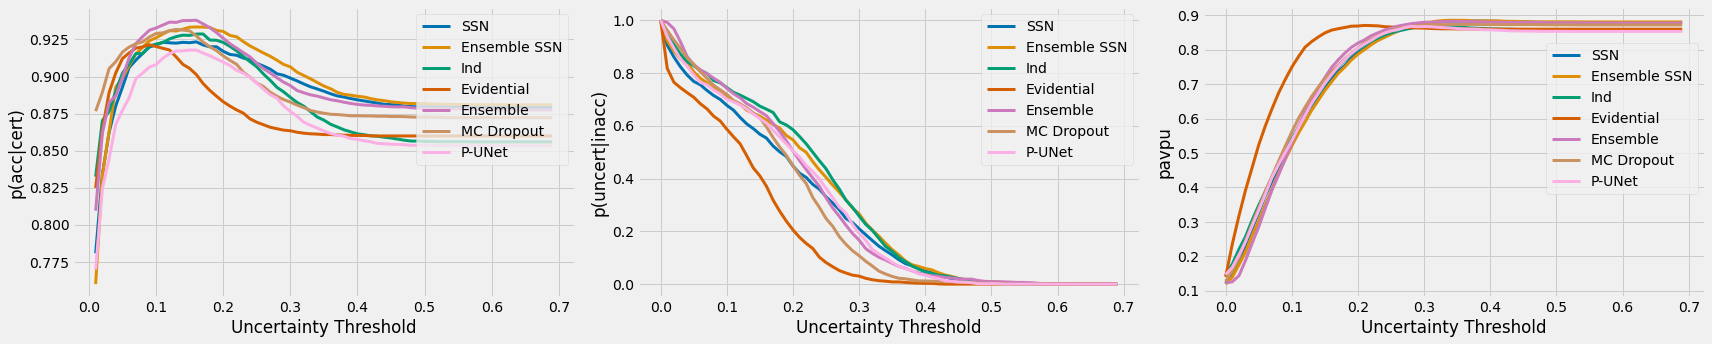

In [374]:
plt.figure(figsize=(24,5))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

lw = 3
plt.subplot(1,3,1)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['p_acs:'])
    plt.plot(taus, metric, linewidth=lw, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("p(acc|cert)");
    
plt.subplot(1,3,2)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['p_aus:'])
    plt.plot(taus, metric, linewidth=lw, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("p(uncert|inacc)");
    
plt.subplot(1,3,3)
for method in methods_map.keys():
    taus = extract_list(dfm.loc[method]['uncertainty thresholds'])
    metric = bin_acc = extract_list(dfm.loc[method]['pavpu:'])
    plt.plot(taus, metric, linewidth=lw, label=methods_map[method])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("pavpu");


save(fname='pavpu')

### compute best tau on patch metrics

### plot small lesion detection metrics

In [375]:
indid = '01'

In [376]:
methods_map = {
    #"ssn_DOMAIN_CHANGE":"SSN\ndice all",
    "ssn_muonly_DOMAIN_CHANGE":"SSN",
    #"ssn_ens_DOMAIN_CHANGE": "Ensemble SSN\ndice all",
    "ssn_ens_muonly_DOMAIN_CHANGE": "Ensemble SSN",
    f"ssn_ind_mu{indid}_DOMAIN_CHANGE":"Ind",
    #"ssn_ind02":"Ind\n dice all",
    #"evid_region01":"Evidential\nDice",
    "evid_sensoy5_DOMAIN_CHANGE":"Evidential",
    "ensemble_DOMAIN_CHANGE":"Ensemble",
    #"ssn_mcdrop01":"MC Dropout\n(p=0.1)",
    "ssn_mcdrop02_DOMAIN_CHANGE":"MC Dropout",
    #"ssn_mcdrop05":"MC Dropout\n(p=0.5)",
    #"punet10":"P-UNet 10\ndice all",
    "punet_muonly10_DOMAIN_CHANGE":"P-UNet",
    #"punet_muonly20":"P-UNet 20",
}

In [379]:
# from the training domain
tau_at_thresh = {'ssn_muonly_DOMAIN_CHANGE': 0.12,
 'ssn_ens_muonly_DOMAIN_CHANGE': 0.14999999,
 f"ssn_ind_mu{indid}_DOMAIN_CHANGE": 0.13,
 'evid_sensoy5_DOMAIN_CHANGE': 0.089999996,
 'ensemble_DOMAIN_CHANGE': 0.16,
 'ssn_mcdrop02_DOMAIN_CHANGE': 0.26999998,
 'punet_muonly10_DOMAIN_CHANGE': 0.2}

tau_index_at_thresh = {'ssn_muonly_DOMAIN_CHANGE': 12,
 'ssn_ens_muonly_DOMAIN_CHANGE': 15,
 f"ssn_ind_mu{indid}_DOMAIN_CHANGE": 13,
 'evid_sensoy5_DOMAIN_CHANGE': 9,
 'ensemble_DOMAIN_CHANGE': 16,
 'ssn_mcdrop02_DOMAIN_CHANGE': 27,
 'punet_muonly10_DOMAIN_CHANGE': 20}

# # from the training domain
# tau_at_thresh = {'ssn_muonly_DOMAIN_CHANGE': 0.12,
#  'ssn_ens_DOMAIN_CHANGE': 0.14,
#  f"ssn_ind_mu{indid}_DOMAIN_CHANGE": 0.13,
#  'evid_sensoy5_DOMAIN_CHANGE': 0.089999996,
#  'ensemble_DOMAIN_CHANGE': 0.16,
#  'ssn_mcdrop02_DOMAIN_CHANGE': 0.26999998,
#  'punet_muonly10_DOMAIN_CHANGE': 0.2}

# tau_index_at_thresh = {'ssn_muonly_DOMAIN_CHANGE': 12,
#  'ssn_ens_DOMAIN_CHANGE': 14,
#  f"ssn_ind_mu{indid}_DOMAIN_CHANGE": 13,
#  'evid_sensoy5_DOMAIN_CHANGE': 9,
#  'ensemble_DOMAIN_CHANGE': 16,
#  'ssn_mcdrop02_DOMAIN_CHANGE': 27,
#  'punet_muonly10_DOMAIN_CHANGE': 20}

[0.63696593, 0.62892026, 0.57973474, 0.6209852, 0.5422256, 0.37512097, 0.57815045]
[0.060193073, 0.057353776, 0.06927882, 0.093128905, 0.10335037, 0.24134015, 0.08006814]
[0.7221108, 0.7223053, 0.6525683, 0.6612153, 0.5207249, 0.19076055, 0.6420499]


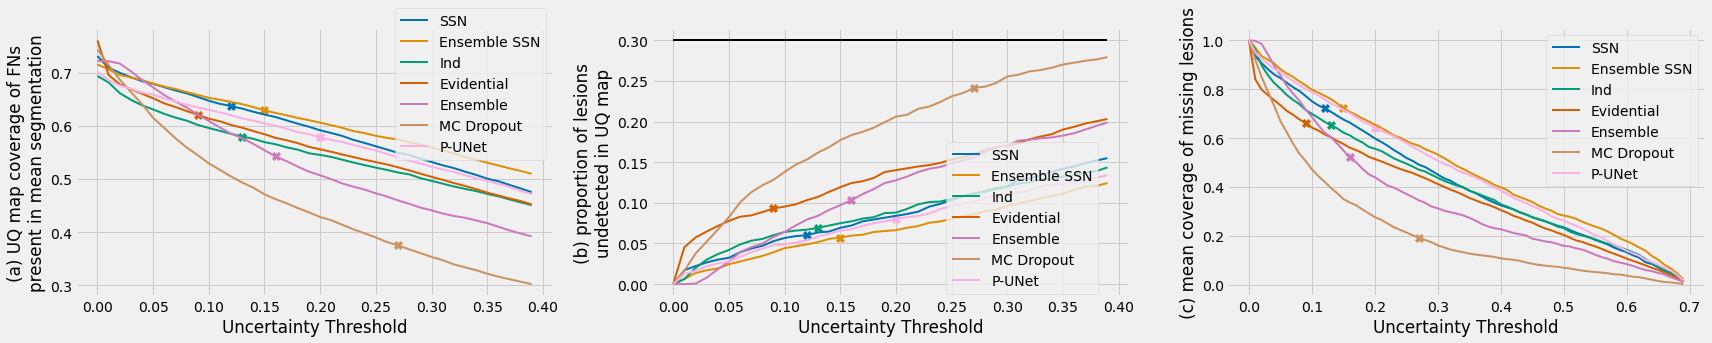

In [380]:
plt.figure(figsize=(24,5))
#plt.plot([0,1],[0,1], c='black', linewidth=3);

r = 40

plt.subplot(1,3,1)
values = []
for method in methods_map.keys():
    taus = extract_list(dfa.loc[method]['uncertainty thresholds'])[0:r]
    metric = extract_list(dfa.loc[method]['mean coverage of areas missed by mean as tau increases'])[0:r]
    plt.plot(taus, metric, linewidth=2, label=methods_map[method])
    plt.scatter([tau_at_thresh[method]], [metric[tau_index_at_thresh[method]]], marker='X', s=70)
    values.append(metric[tau_index_at_thresh[method]])
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1.1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("(a) UQ map coverage of FNs\npresent in mean segmentation");
print(values)
    
plt.subplot(1,3,2)
values = []
for method in methods_map.keys():
    taus = extract_list(dfa.loc[method]['uncertainty thresholds'])[0:r]
    metric = extract_list(dfa.loc[method]['proportion of lesions entirely missed'])[0:r]
    plt.plot(taus, metric, linewidth=2, label=methods_map[method])
    plt.scatter([tau_at_thresh[method]], [metric[tau_index_at_thresh[method]]], marker='X', s=70)
    #print(metric[-1])
    values.append(metric[tau_index_at_thresh[method]])
    plt.plot(taus, [0.300 for _ in range(len(taus))], c='black', linewidth=2)
    plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.6))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("(b) proportion of lesions\nundetected in UQ map");
print(values)

plt.subplot(1,3,3)
values = []
for method in methods_map.keys():
    taus = extract_list(dfa.loc[method]['uncertainty thresholds'])
    metric = extract_list(dfa.loc[method]['mean coverage of lesions entirely missed by the mean segmentation'])
    plt.plot(taus, metric, linewidth=2, label=methods_map[method])
    #plt.scatter([tau_at_thresh[method]], [metric[tau_index_at_thresh[method]]], marker='X')
    plt.scatter([tau_at_thresh[method]], [metric[tau_index_at_thresh[method]]], marker='X', s=70)
    values.append(metric[tau_index_at_thresh[method]])
    plt.legend(loc='upper right', bbox_to_anchor=(1,1))
    plt.xlabel("Uncertainty Threshold")
    plt.ylabel("(c) mean coverage of missing lesions");
print(values)
    
save(fname='lesion_detection')

In [383]:
folders

['evid_sensoyx5kl1',
 'ssn_mcdrop05',
 'ssn_ind_mu02_DOMAIN_CHANGE',
 'punet_muonly10_DOMAIN_CHANGE',
 'ssn_ind_mu01_DOMAIN_CHANGE',
 'ssn_ens_cust_small',
 'evid_region01',
 'evid_sensoy5',
 'ssn_ind_mu02',
 'ssn_ens_DOMAIN_CHANGE',
 'ssn_mcdrop05_DOMAIN_CHANGE',
 'punet_muonly20',
 'punet_muonly50',
 'ssn_DOMAIN_CHANGE',
 'punet_muonlyboth20',
 'punet20_DOMAIN_CHANGE',
 'ssn_ind_mu03_DOMAIN_CHANGE',
 'ssn_ens_muonly',
 'ssn_mcdrop02',
 'evid_sensoy5_DOMAIN_CHANGE',
 'punet_muonly10',
 'punet_muonlyboth5',
 'punet_muonlyboth10',
 'punet_muonlyboth50',
 'punet5_DOMAIN_CHANGE',
 'ssn_ind_mu03',
 'evid_sensoyx1kl1',
 'evid_region005',
 'ssn_ind02',
 'evid_region01_DOMAIN_CHANGE',
 'evid_sensoyx1kl1_DOMAIN_CHANGE',
 'evid_region005_DOMAIN_CHANGE',
 'evid_sensoyx5kl1_DOMAIN_CHANGE',
 'ssn_mcdrop01_DOMAIN_CHANGE',
 'ssn_muonly',
 'ensemble',
 'ensemble_DOMAIN_CHANGE',
 'punet_muonlyboth50_DOMAIN_CHANGE',
 'punet10',
 'punet5',
 'punet10_DOMAIN_CHANGE',
 'punet_muonly5',
 'ssn_mcdrop01',
 's

In [384]:
### table of useful information
# - record sUEO, sample diveristy, GED, ece, capture of missing lesions at best tau (but I need to check if calibration actually helps before I do that....

In [385]:
dfm['EXPECTED CALIBRATION ERROR']

method
punet_muonly10_DOMAIN_CHANGE    0.112145
ssn_ind_mu01_DOMAIN_CHANGE      0.131915
evid_sensoy5_DOMAIN_CHANGE      0.105969
ensemble_DOMAIN_CHANGE          0.089893
ssn_ens_muonly_DOMAIN_CHANGE    0.130592
ssn_mcdrop02_DOMAIN_CHANGE      0.073161
ssn_muonly_DOMAIN_CHANGE        0.116481
Name: EXPECTED CALIBRATION ERROR, dtype: float64

In [386]:
# # best pavpu threshold is done by taking the max of each pavpu metric at each point
# plt.figure(figsize=(8,5))
# plt.plot([0,1],[0,1], c='black', linewidth=3);

# for method in ['ssn_ind_mu02', 'ssn_ens_muonly']:
#     bin_accs = extract_list(dfm.loc[method]['bin_accuracies: '])
#     bin_confs = bin_acc = extract_list(dfm.loc[method]['bin_confidences: '])
    
#     plt.plot(bin_confs, bin_accs, linewidth=4, label=methods_map[method])

# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# plt.xlabel("Confidence")
# plt.ylabel("Accuracy");
# #plt.suptitle("Calibration Curves per method")
# #save_result_plot("calibration_in_domain_deterministic")

In [306]:
dfm['sUEO']

method
punet_muonly10_DOMAIN_CHANGE    0.283499
ssn_ind_mu01_DOMAIN_CHANGE      0.290797
evid_sensoy5_DOMAIN_CHANGE      0.284488
ensemble_DOMAIN_CHANGE          0.183701
ssn_ens_muonly_DOMAIN_CHANGE    0.336118
ssn_mcdrop02_DOMAIN_CHANGE      0.105726
ssn_muonly_DOMAIN_CHANGE        0.306435
Name: sUEO, dtype: float64

In [307]:
dfm.keys()

Index(['dice', 'hd95', 'avd', 'recall', 'f1', 'mean AVD', 'mean dice',
       'best_dice_mean', 'check: len samples', 'calibration curve data: ',
       'bin_accuracies: ', 'bin_confidences: ', 'EXPECTED CALIBRATION ERROR',
       'sample diversity', 'generalized energy distance:', 'p_acs:', 'p_aus:',
       'pavpu:', 'vvc correlation coefficient:', 'tp, fp, fn totals',
       'TP mean', 'FP mean', 'FN mean', 'TP ent values', 'FP ent values',
       'FN ent values', 'uncertainty thresholds',
       'mean coverage of areas missed by mean as tau increases',
       'mean size of entirely missed lesions',
       'mean coverage of lesions entirely missed by the mean segmentation',
       'total number of missing lesions',
       'proportion of lesions entirely missed', 'num lesions:', 'sUEO',
       'best tau for max UEO', 'max UEO', 'UEO per tau', 'tau AUC'],
      dtype='object')

In [308]:
dfm[['sUEO', 'sample diversity', 'generalized energy distance:', 'best tau for max UEO', 'mean dice']]

,sUEO,sample diversity,generalized energy distance:,best tau for max UEO,mean dice
method,,,,,
punet_muonly10_DOMAIN_CHANGE,0.283499,0.116065,1.019268,0.40,0.565832
ssn_ind_mu01_DOMAIN_CHANGE,0.290797,0.042644,1.112714,0.33,0.552335
evid_sensoy5_DOMAIN_CHANGE,0.284488,0.000000,1.102495,0.36,0.578200
ensemble_DOMAIN_CHANGE,0.183701,0.384432,0.726181,0.27,0.621422
ssn_ens_muonly_DOMAIN_CHANGE,0.336118,0.510369,0.699858,0.40,0.624604
ssn_mcdrop02_DOMAIN_CHANGE,0.105726,0.215792,0.864370,0.31,0.594564
ssn_muonly_DOMAIN_CHANGE,0.306435,0.382302,0.804852,0.37,0.583429


In [309]:
dfm.keys()

Index(['dice', 'hd95', 'avd', 'recall', 'f1', 'mean AVD', 'mean dice',
       'best_dice_mean', 'check: len samples', 'calibration curve data: ',
       'bin_accuracies: ', 'bin_confidences: ', 'EXPECTED CALIBRATION ERROR',
       'sample diversity', 'generalized energy distance:', 'p_acs:', 'p_aus:',
       'pavpu:', 'vvc correlation coefficient:', 'tp, fp, fn totals',
       'TP mean', 'FP mean', 'FN mean', 'TP ent values', 'FP ent values',
       'FN ent values', 'uncertainty thresholds',
       'mean coverage of areas missed by mean as tau increases',
       'mean size of entirely missed lesions',
       'mean coverage of lesions entirely missed by the mean segmentation',
       'total number of missing lesions',
       'proportion of lesions entirely missed', 'num lesions:', 'sUEO',
       'best tau for max UEO', 'max UEO', 'UEO per tau', 'tau AUC'],
      dtype='object')

In [310]:
### Load the non-calibrated dataset

In [311]:
results_dir = "/home/s2208943/ipdis/results/final_results_data/non_calib_results/"

folders = os.listdir(results_dir)
folders = [f for f in folders if "ipynb" not in f]

with open(results_dir + folders[0] + "/text_results.txt") as f:
    column_names = ["method"]
    column_locations = [0]
    lines = f.readlines()
    
    for i, line in enumerate(lines[1:]): # title is on the first lien
        if line == '\n':
            continue
        else:
            line = line[:-1]
            if line[0].isalpha():
                column_names.append(line)
                column_locations.append(i+1)
                
columns = {c:[] for c in column_names}
for f in folders:
    with open(results_dir + f + "/text_results.txt") as file:
        lines = file.readlines()
        if len(lines) != filelength:
            continue # partial or failed evaluation runs
        columns['method'].append(f)
        for j, cn in enumerate(column_names[1:]):
            line = lines[column_locations[j+1]+1]
            line = line[:-1] # remove the \n at the end
            
            # convert to numbers
            if line != '':
                if line[0] != '[':
                    line = float(line)
                # else:
                #     line = list(line)
            
            columns[cn].append(line)
            
non_calib_df = pd.DataFrame(columns)

methods_map_noncalib = {
    #"ssn":"SSN\ndice all",
    "ssn_muonly_DOMAIN_CHANGE":"SSN",
    #"ssn_ens": "Ensemble SSN\ndice all",
    "ssn_ens_muonly_DOMAIN_CHANGE": "Ensemble SSN",
    "ssn_ind_mu02_DOMAIN_CHANGE":"Ind",
    #"ssn_ind02":"Ind\n dice all",
    #"evid_region01":"Evidential\nDice",
    "evid_sensoy5_DOMAIN_CHANGE":"Evidential",
    "ensemble_DOMAIN_CHANGE":"Ensemble",
    #"ssn_mcdrop01":"MC Dropout\n(p=0.1)",
    "ssn_mcdrop02_DOMAIN_CHANGE":"MC Dropout",
    #"ssn_mcdrop05":"MC Dropout\n(p=0.5)",
    #"punet10":"P-UNet 10\ndice all",
    "punet_muonly10_DOMAIN_CHANGE":"P-UNet",
    #"punet_muonly20":"P-UNet 20",
}

# select methods
non_calib_dfm = non_calib_df.loc[non_calib_df["method"].isin(methods_map_noncalib.keys())]
non_calib_dfm = non_calib_dfm.set_index('method')
non_calib_dfa = non_calib_df.set_index('method')

In [312]:
### make plots of before and after post-hoc calibration tps, fps, fns.

In [313]:
non_calib_dfm.keys()

Index(['dice', 'hd95', 'avd', 'recall', 'f1', 'mean AVD', 'mean dice',
       'best_dice_mean', 'check: len samples', 'calibration curve data: ',
       'bin_accuracies: ', 'bin_confidences: ', 'EXPECTED CALIBRATION ERROR',
       'sample diversity', 'generalized energy distance:', 'p_acs:', 'p_aus:',
       'pavpu:', 'vvc correlation coefficient:', 'tp, fp, fn totals',
       'TP mean', 'FP mean', 'FN mean', 'TP ent values', 'FP ent values',
       'FN ent values', 'uncertainty thresholds',
       'mean coverage of areas missed by mean as tau increases',
       'mean size of entirely missed lesions',
       'mean coverage of lesions entirely missed by the mean segmentation',
       'total number of missing lesions',
       'proportion of lesions entirely missed', 'num lesions:', 'sUEO',
       'best tau for max UEO', 'max UEO', 'UEO per tau', 'tau AUC'],
      dtype='object')

In [314]:
tps_nc = extract_list(non_calib_dfm.T['ssn_mcdrop02_DOMAIN_CHANGE'][['TP ent values']].values[0])
fps_nc = extract_list(non_calib_dfm.T['ssn_mcdrop02_DOMAIN_CHANGE'][['FP ent values']].values[0])
fns_nc = extract_list(non_calib_dfm.T['ssn_mcdrop02_DOMAIN_CHANGE'][['FN ent values']].values[0])

j = -1
ntps = len(tps_nc)
nfns = len(fns_nc)
nfps = len(fps_nc)
data_nc = {"label":["TP" for _ in range(ntps)] + ["FN" for _ in range(nfns)] + ["FP" for _ in range(nfps)],
           "calib":[r"$\rho$=1" for _ in range(ntps+nfns+nfps)],
           "ent": np.concatenate([tps_nc, fns_nc, fps_nc])}

In [315]:
data_nc['label'].__len__(), data_nc['ent'].__len__(), data_nc['calib'].__len__()

(249604, 249604, 249604)

In [316]:
tps = extract_list(dfm.T['ssn_mcdrop02_DOMAIN_CHANGE'][['TP ent values']].values[0])
fps = extract_list(dfm.T['ssn_mcdrop02_DOMAIN_CHANGE'][['FP ent values']].values[0])
fns = extract_list(dfm.T['ssn_mcdrop02_DOMAIN_CHANGE'][['FN ent values']].values[0])

j = -1
ntps = len(tps)
nfns = len(fns)
nfps = len(fps)
data = {"label":["TP" for _ in range(ntps)] + ["FN" for _ in range(nfns)] + ["FP" for _ in range(nfps)],
        "calib":[r"$\rho$=1.5" for _ in range(ntps+nfns+nfps)],
        "ent": np.concatenate([tps, fns, fps])}

data = {"label":data_nc['label'] + data['label'], "calib":data_nc['calib'] + data['calib'], "ent":np.append(data_nc['ent'], data['ent'])}

In [317]:
data['label'].__len__(), data['ent'].__len__(), data['calib'].__len__()

(499208, 499208, 499208)

In [318]:
ddf = pd.DataFrame(data)

In [319]:
#ddf.groupby(by=["species"])["sepal_length"].median().iloc[::-1].index

In [320]:
sns.set_palette(sns.color_palette("pastel"))

Text(0, 0.5, '$H$')

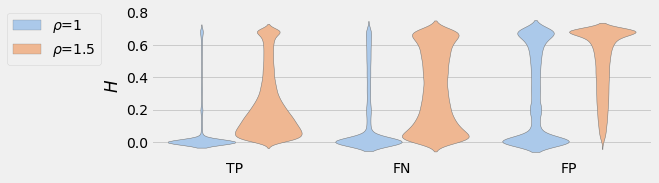

In [321]:
# Plot of distributions of true positives, false positives, false negatives before and after temperature scaling.
plt.figure(figsize=(8, 2.5))
sns.violinplot(x="label", y="ent", data=data, linewidth=0.5, inner=None, hue='calib', scale='count')
plt.legend(bbox_to_anchor=(-0.1, 1), loc='upper right', borderaxespad=0)
plt.ylim((-0.1, 0.8))
plt.ylabel("$H$")

In [322]:
len(extract_list(dfm.T["ssn_mcdrop02_DOMAIN_CHANGE"][['TP ent values']].values[0])), len(extract_list(non_calib_dfm.T["ssn_mcdrop02_DOMAIN_CHANGE"][['TP ent values']].values[0]))

(149799, 149799)

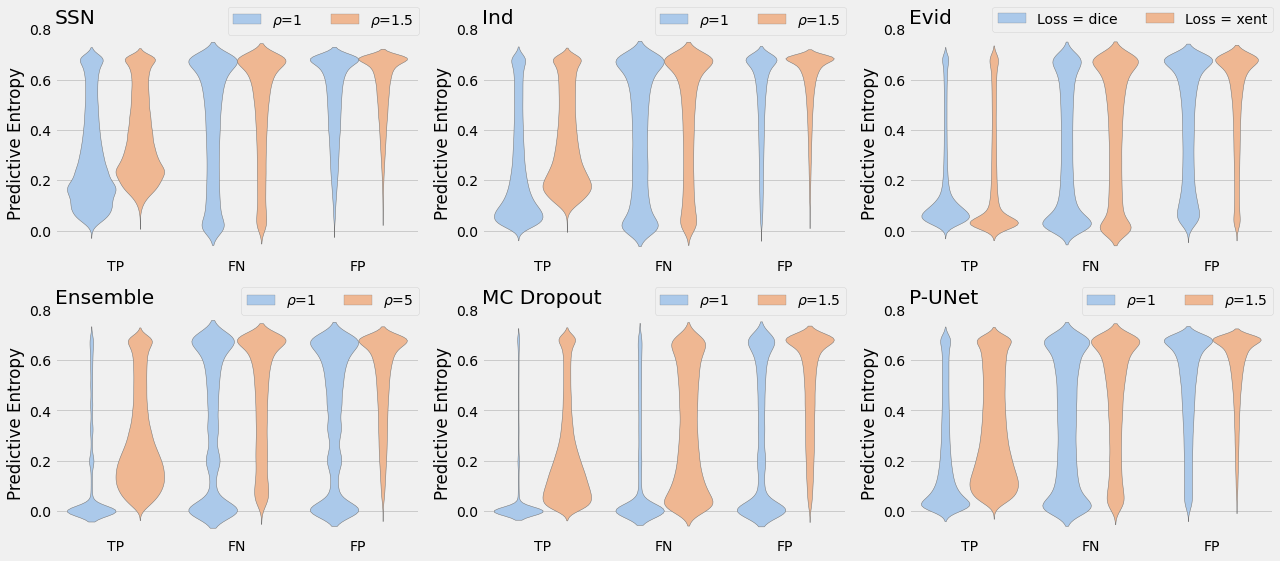

In [323]:
plt.figure(figsize=(18,8))
cols = 3
rows = 2
c = counter()
           
           
for method in methods_map.keys():
    if method == "ssn_ens_muonly_DOMAIN_CHANGE":
           continue
    
    
    # in the non calibrated data, ind model 02 is evaluated instead of 07.
    if "ind" in method:
        methodn = 'ssn_ind_mu02_DOMAIN_CHANGE'
    elif "evid" in method:
        methodn = "evid_region01_DOMAIN_CHANGE"
    else:
        methodn = method
    
    # build non calibrated distribution
    mmod_dm = non_calib_dfm if "evid" not in method else dfa
    tps_nc = extract_list(mmod_dm.T[methodn][['TP ent values']].values[0])
    fps_nc = extract_list(mmod_dm.T[methodn][['FP ent values']].values[0])
    fns_nc = extract_list(mmod_dm.T[methodn][['FN ent values']].values[0])

    j = -1
    ntps = len(tps_nc)
    nfns = len(fns_nc)
    nfps = len(fps_nc)
    
    if method == "ensemble" or "mcdrop" in method:
        calib_message = r"$\rho$=1"
    elif "evid" not in method:
        calib_message = r"$\rho$=1"
    else:
        calib_message = "Loss = dice"
    
    data_nc = {"label":["TP" for _ in range(ntps)] + ["FN" for _ in range(nfns)] + ["FP" for _ in range(nfps)],
               "calib":[calib_message for _ in range(ntps+nfns+nfps)],
               "ent": np.concatenate([tps_nc, fns_nc, fps_nc])}
           
    # build calibrated distribution
    tps = extract_list(dfm.T[method][['TP ent values']].values[0])
    fps = extract_list(dfm.T[method][['FP ent values']].values[0])
    fns = extract_list(dfm.T[method][['FN ent values']].values[0])

    j = -1
    ntps = len(tps)
    nfns = len(fns)
    nfps = len(fps)
    
    if method == "ensemble_DOMAIN_CHANGE" or "mcdrop_DOMAIN_CHANGE" in method:
        calib_message = r"$\rho$=5"
    elif "evid" not in method:
        calib_message = r"$\rho$=1.5"
    else:
        calib_message = "Loss = xent"
    data = {"label":["TP" for _ in range(ntps)] + ["FN" for _ in range(nfns)] + ["FP" for _ in range(nfps)],
            "calib":[calib_message for _ in range(ntps+nfns+nfps)],
            "ent": np.concatenate([tps, fns, fps])}

    # combine data
    data = {"label":data_nc['label'] + data['label'], "calib":data_nc['calib'] + data['calib'], "ent":np.append(data_nc['ent'], data['ent'])}
           
    # Plot of distributions of true positives, false positives, false negatives before and after temperature scaling.
    plt.subplot(rows, cols, next(c))
    sns.violinplot(x="label", y="ent", data=data, linewidth=0.5, inner=None, hue='calib', scale='count')
    plt.legend(bbox_to_anchor=(1, 1.1), loc='upper right', borderaxespad=0, ncol=2)
    if 'evid' in method:
        name = "Evid"
    else:
        name = methods_map[method]
    plt.title(name, loc='left')
    plt.ylim((-0.1, 0.8))
    plt.ylabel("Predictive Entropy")
    
save(fname='calibration_type_distributions')

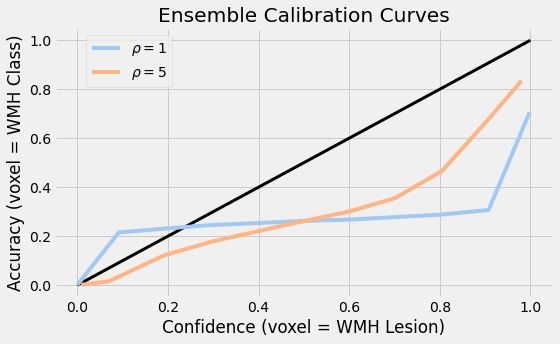

In [324]:
### Calibration of Ensemble before and after dropout
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], c='black', linewidth=3);

bin_accs = extract_list(non_calib_dfm.loc["ensemble_DOMAIN_CHANGE"]['bin_accuracies: '])
bin_confs = bin_acc = extract_list(non_calib_dfm.loc["ensemble_DOMAIN_CHANGE"]['bin_confidences: '])
plt.plot(bin_confs, bin_accs, linewidth=4, label=r"$\rho=1$")

bin_accs = extract_list(dfm.loc["ensemble_DOMAIN_CHANGE"]['bin_accuracies: '])
bin_confs = bin_acc = extract_list(dfm.loc["ensemble_DOMAIN_CHANGE"]['bin_confidences: '])
plt.plot(bin_confs, bin_accs, linewidth=4, label=r"$\rho=5$")

plt.legend(loc='upper right', bbox_to_anchor=(0.25, 1))
plt.xlabel("Confidence (voxel = WMH Lesion)")
plt.ylabel("Accuracy (voxel = WMH Class)");
plt.title('Ensemble Calibration Curves')

save(fname='calibration_mcdrop')

In [325]:
### Differences in Uncertianty maps before and after

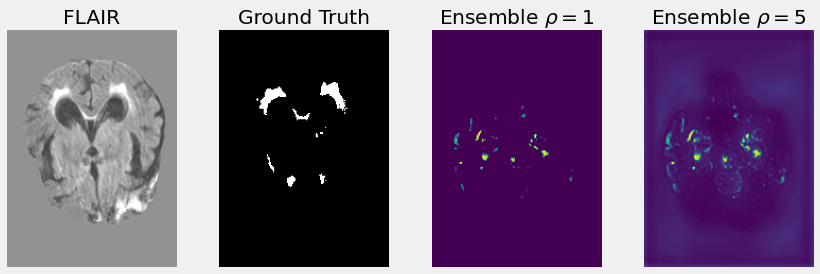

In [327]:
scan_id = 3
slice_id = 18

flair_folder = "./results/results_collection_testing/images/"
flair_img = f"FLAIR: {scan_id}:{slice_id}.png"
gt_img = f"GT: {scan_id}:{slice_id}.png"

rows = 1
cols = 4
c = counter()

plt.figure(figsize=(12, 4))

img = plt.imread(flair_folder + flair_img)
plt.subplot(rows, cols, next(c))
plt.title('FLAIR')
plt.imshow(img); plt.axis('off')

img = plt.imread(flair_folder + gt_img)
plt.subplot(rows, cols, next(c))
plt.title('Ground Truth')
plt.imshow(img); plt.axis('off')


method = "ensemble_DOMAIN_CHANGE"
img_folder = "/home/s2208943/ipdis/results/final_results_data/non_calib_results/" + method + "/images/"
ent_img = f"ent_map: {scan_id}:{slice_id}.png"
img = plt.imread(img_folder + ent_img)
plt.subplot(rows, cols, next(c))
plt.title(methods_map[method] + r" $\rho=1$")
plt.imshow(img); plt.axis('off')

img_folder = "/home/s2208943/ipdis/results/final_results_data/results/" + method + "/images/"
ent_img = f"ent_map: {scan_id}:{slice_id}.png"
img = plt.imread(img_folder + ent_img)
plt.subplot(rows, cols, next(c))
plt.title(methods_map[method] + r" $\rho=5$")
plt.imshow(img); plt.axis('off')

save(fname='post_hoc_umap')